In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Estadísticas
import scipy
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

# Graficos ggplot similar a R
#from plotnine import *  # Antes instalar > py_install("plotnine") desde R o Python

# tablas de frecuencias
#import sidetable as stb

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv")
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
datos['HeartDisease01'] = np.where(datos ['HeartDisease']== "Yes", 1, 0)

In [ ]:
datos = datos.drop("HeartDisease", axis='columns')

In [ ]:
datos_dummis = pd.get_dummies(datos, drop_first = True)
datos_dummis

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
import pandas as nd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(datos_dummis)


In [ ]:
n_components=11
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
components=[]
n=1
while n<=n_components:
    components.append("PC"+str(n))
    n=n+1
principal_df = pd.DataFrame(data=principal_components, columns=components)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada:", explained_variance)

Varianza Explicada: [0.07793772 0.05435532 0.04035278 0.03685245 0.03279043 0.03114457
 0.02939376 0.02920255 0.02866781 0.02855555 0.02845365]


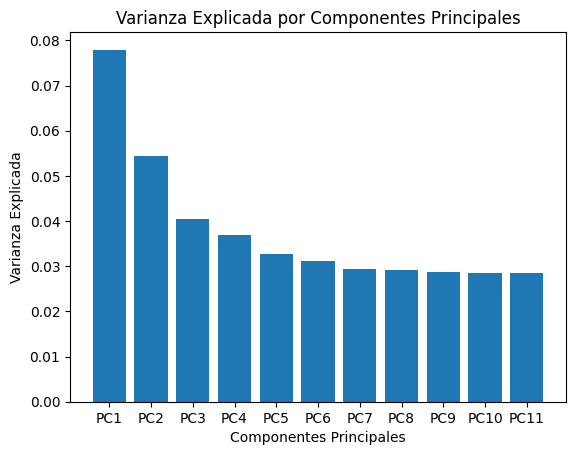

In [ ]:
plt.bar(components, explained_variance)
plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por Componentes Principales")
plt.show()

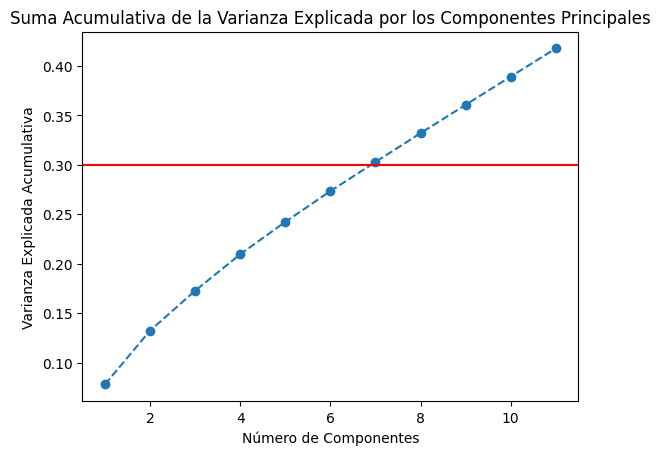

In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = len(pca.explained_variance_ratio_)
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker="o", linestyle="--")
plt.axhline(y=0.3, color="r", linestyle="-")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulativa")
plt.title("Suma Acumulativa de la Varianza Explicada por los Componentes Principales")
plt.show()

In [ ]:
#en el gráfico anterior, podemos ver que con 4 compoentes capturamos el 30% de la explicación de la varianza, por lo que
#corremos nuevamente el modelo, solo que esta vez seleccionamos 3 componentes, y éste sería nuestro modelo de PCA final
n_components=4
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
components=[]
n=1
while n<=n_components:
    components.append("PC"+str(n))
    n=n+1
principal_df = pd.DataFrame(data=principal_components, columns=components)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada:", explained_variance)

Varianza Explicada: [0.07793387 0.05427063 0.03987913 0.03495382]


In [ ]:
variable_names = datos_dummis.columns
components_df = pd.DataFrame(pca.components_, columns=variable_names, index=components)

Contribución a los Componentes Principales

In [ ]:
print("Contribuciones de las variables originales a los componentes principales:\n")
components_df

Contribuciones de las variables originales a los componentes principales:



,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
PC1,0.174477,0.400397,0.189413,-0.036175,0.257243,0.146137,-0.034371,0.201642,0.403516,-0.033529,...,0.261960,-0.009143,-0.269819,0.275215,0.061070,0.305961,-0.239646,0.121205,0.196106,0.079857
PC2,0.128898,0.028274,0.125585,-0.129953,-0.137219,-0.100161,-0.023967,-0.066629,-0.007145,-0.040399,...,-0.002367,0.042845,-0.073594,0.067464,0.084949,-0.006666,-0.139740,0.074079,-0.056167,-0.269546
PC3,0.080652,-0.262303,-0.372724,0.203445,0.147264,-0.061768,-0.137691,0.095742,-0.040551,0.099537,...,0.204813,-0.057921,-0.032961,-0.156829,0.524972,-0.207402,-0.300144,-0.104442,0.047237,0.141223
PC4,-0.224673,0.047043,-0.147074,0.120452,0.099475,-0.288134,-0.234133,0.072350,0.080286,-0.169951,...,0.014005,0.040076,0.006707,-0.073562,-0.375172,0.185868,0.344188,-0.078954,0.076241,0.197400


In [ ]:
import seaborn as sns

Debido al hecho de que ninguna variable tiene una distribución normal, la forma correcta de probar la correlación es usando la medida de Kendalltau.

<Axes: >

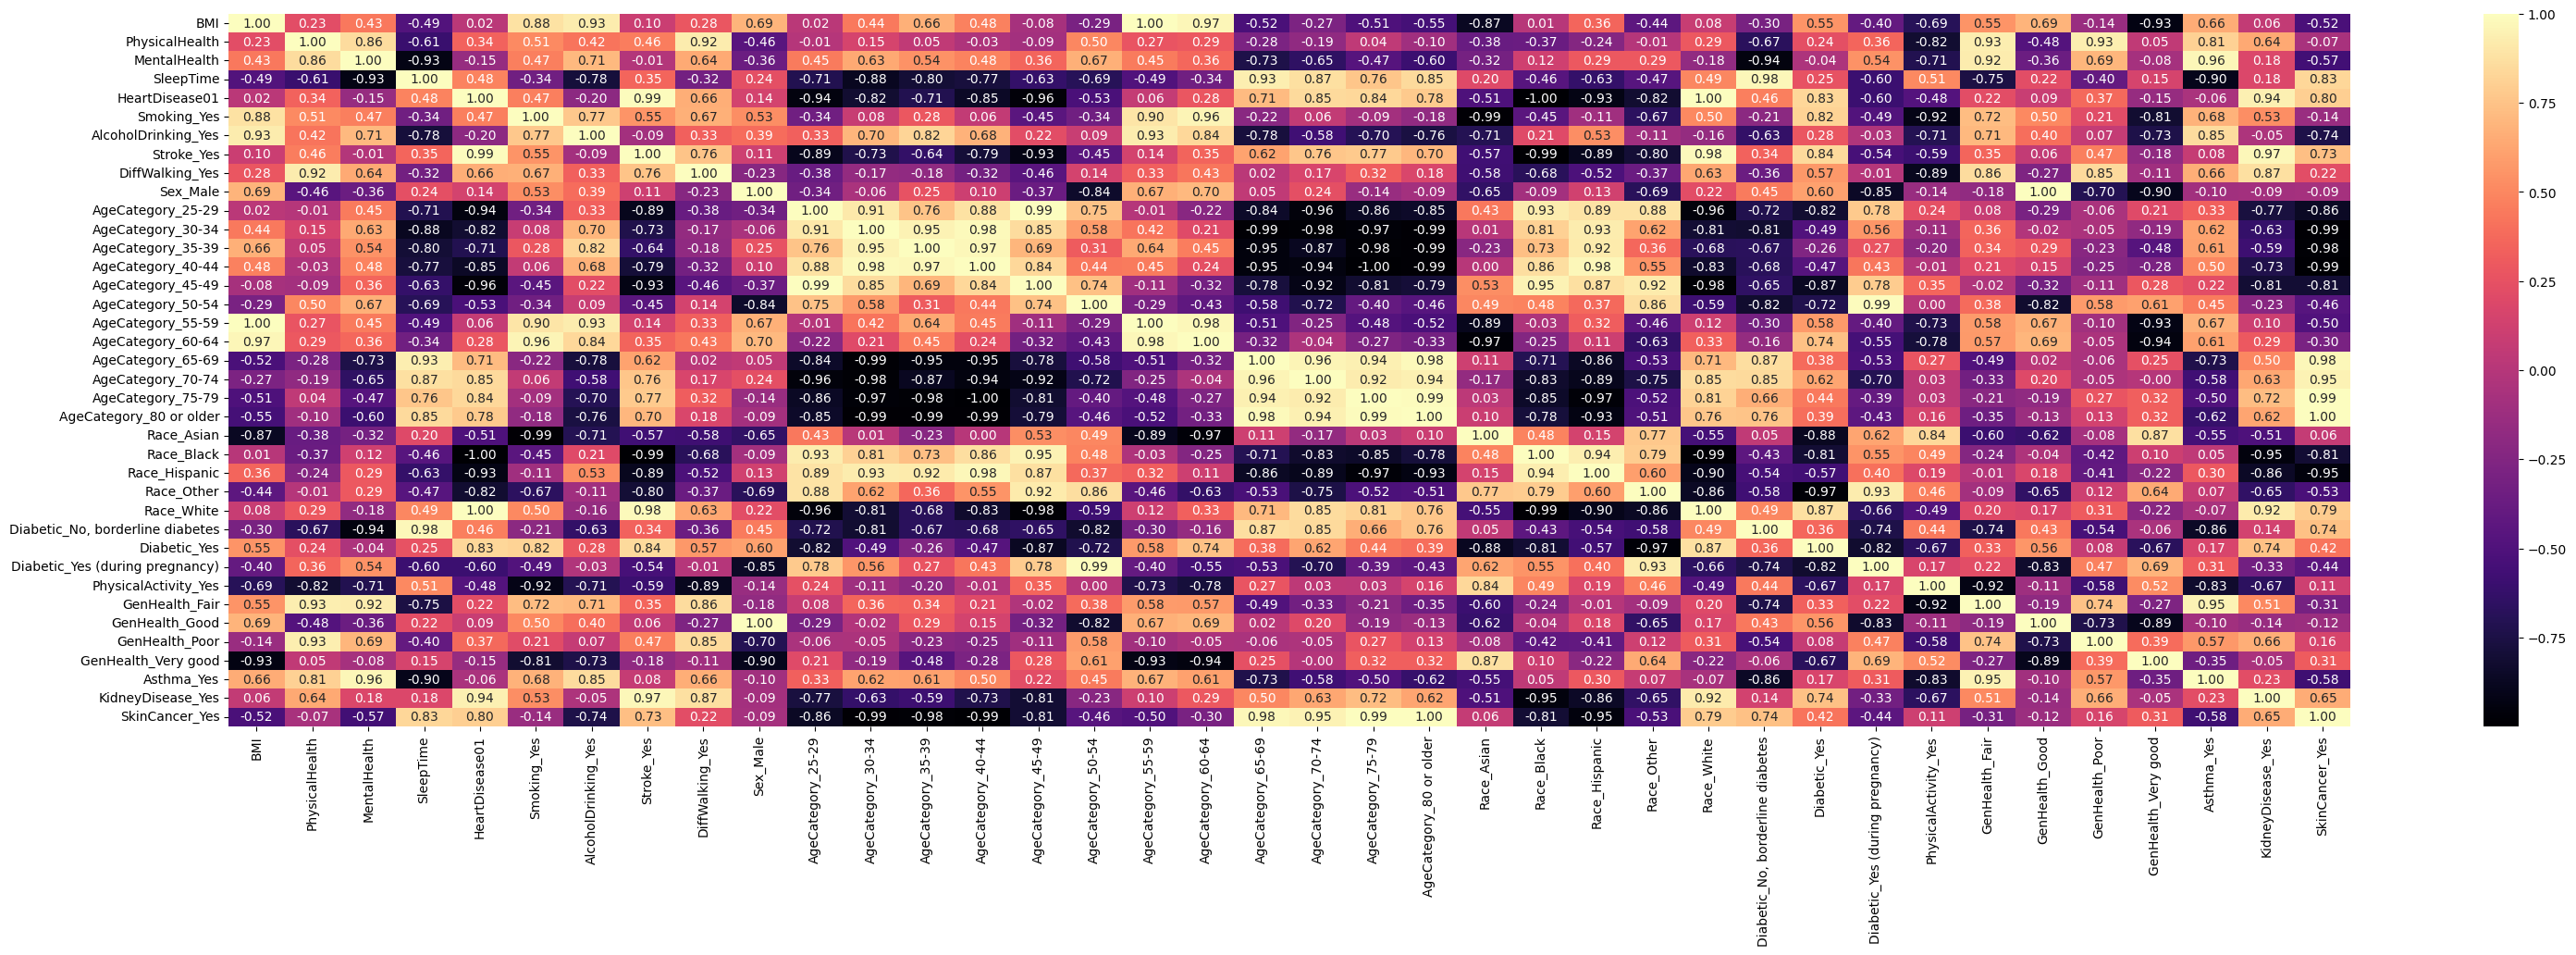

In [ ]:
plt.figure(figsize=(37,10))
sns.heatmap(components_df.corr(),annot=True,cmap="magma",fmt='.2f')